In [69]:
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import geopandas as gpd
import cenpy as cp
import matplotlib.pyplot as plt
from libpysal import weights
from model import Agent
from shapely import wkt

/Users/giuseppeperona/opt/anaconda3/envs/ox/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [80]:
#ca_counties = cp.products.ACS(2019).from_state('California', level='county', variables='B01001_001E')
ca_counties_pd = pd.read_csv('ca_counties.csv')
ca_counties_pd['geometry'] = ca_counties_pd['geometry'].apply(wkt.loads)
ca_counties = gpd.GeoDataFrame(ca_counties_pd)

ca_counties = ca_counties.rename({'B01001_001E': 'population'}, axis=1)

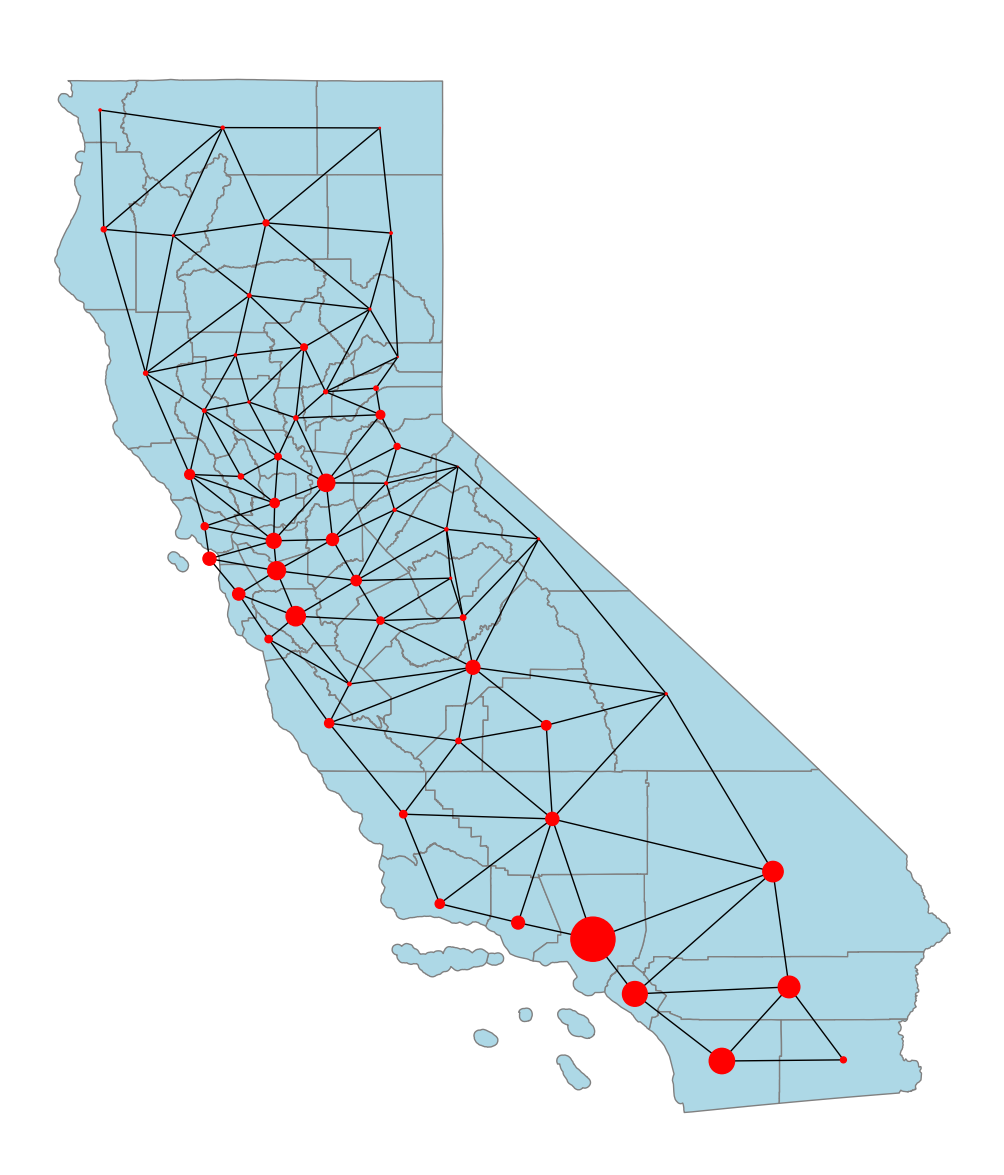

In [81]:
# extract the centroids for connecting the regions, which is
# the average of the coordinates that define the polygon's boundary
centroids = np.column_stack((ca_counties.centroid.x, ca_counties.centroid.y))

# construct the "Queen" adjacency graph. In geographical applications,
# the "Queen" adjacency graph considers two polygons as connected if
# they share a single point on their boundary. This is an analogue to
# the "Moore" neighborhood nine surrounding cells in a regular grid.
queen = weights.Queen.from_dataframe(ca_counties)

# Then, we can convert the graph to networkx object using the
# .to_networkx() method.
graph = queen.to_networkx()
names = dict(zip(graph.nodes, ca_counties['NAME'].str[:-12]))
graph = nx.relabel_nodes(graph, names)

# To plot with networkx, we need to merge the nodes back to
# their positions in order to plot in networkx
positions = dict(zip(graph.nodes, centroids))
populations = dict(zip(graph.nodes, ca_counties['population']))

nx.set_node_attributes(graph, populations, 'population')
nx.set_node_attributes(graph, names, 'name')

# plot with a nice basemap
ax = ca_counties.plot(linewidth=1, edgecolor="grey", facecolor="lightblue", figsize=(15,15))
ax.axis("off")
nx.draw(graph, positions, ax=ax, node_size=1e-4*ca_counties['population'], node_color="r")
plt.show()

In [75]:
graph.nodes

NodeView(('Genesee Coun', 'Rensselaer Coun', 'Chautauqua Coun', 'Albany Coun', 'Queens Coun', 'Schoharie Coun', 'Chenango Coun', 'Essex Coun', 'Lewis Coun', 'Bronx Coun', 'Montgomery Coun', 'Putnam Coun', 'Wyoming Coun', 'Columbia Coun', 'Onondaga Coun', 'Fulton Coun', 'Jefferson Coun', 'Allegany Coun', 'Oswego Coun', 'Steuben Coun', 'Ontario Coun', 'Kings Coun', 'Monroe Coun', 'Livingston Coun', 'Tompkins Coun', 'Otsego Coun', 'Orange Coun', 'Orleans Coun', 'Chemung Coun', 'New York Coun', 'Tioga Coun', 'Cattaraugus Coun', 'Ulster Coun', 'Greene Coun', 'Herkimer Coun', 'Schuyler Coun', 'Warren Coun', 'Washington Coun', 'Richmond Coun', 'Seneca Coun', 'Wayne Coun', 'Rockland Coun', 'Sullivan Coun', 'Cortland Coun', 'Broome Coun', 'Yates Coun', 'Oneida Coun', 'Suffolk Coun', 'Westchester Coun', 'Franklin Coun', 'Dutchess Coun', 'Erie Coun', 'Niagara Coun', 'Cayuga Coun', 'St. Lawrence Coun', 'Saratoga Coun', 'Nassau Coun', 'Clinton Coun', 'Delaware Coun', 'Schenectady Coun', 'Hamilton C

In [76]:
graph.nodes['Kings Coun']

{'population': 2589974.0}

In [78]:
a = Agent(graph, 'Kings Coun', q=0.9999999, max_steps=100)

In [79]:
pd.Series(a.simulate(10000)).value_counts()

Kings Coun           3828
Queens Coun          2424
New York Coun        1136
Bronx Coun            764
Nassau Coun           631
Westchester Coun      305
Richmond Coun         262
Suffolk Coun          140
-1                    128
Orange Coun            70
Rockland Coun          48
Dutchess Coun          34
Saratoga Coun          26
Ulster Coun            20
Albany Coun            18
Monroe Coun            15
Putnam Coun            12
Oneida Coun            11
Erie Coun              10
Onondaga Coun           9
Rensselaer Coun         8
Broome Coun             8
Montgomery Coun         8
St. Lawrence Coun       7
Schenectady Coun        7
Oswego Coun             5
Herkimer Coun           5
Greene Coun             4
Madison Coun            4
Cayuga Coun             4
Sullivan Coun           4
Tompkins Coun           3
Lewis Coun              3
Cortland Coun           3
Otsego Coun             3
Chemung Coun            3
Ontario Coun            3
Warren Coun             3
Delaware Cou